In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from pymatreader import read_mat
import scipy.io
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-l8x71tfq because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [30]:
DATA_DIR = Path("/om/data/public/language-eeg/brennan2018-v2")

In [33]:
from mfn400.adapters.brennan2018 import BrennanDatasetAdapter

In [79]:
dataset = BrennanDatasetAdapter(DATA_DIR)

Opening raw data file /om/data/public/language-eeg/brennan2018-v2/eeg/S01/S01_alice-raw.fif...
    Range : 0 ... 366524 =      0.000 ...   733.048 secs
Ready.
Reading 0 ... 366524  =      0.000 ...   733.048 secs...
Opening raw data file /om/data/public/language-eeg/brennan2018-v2/eeg/S03/S03_alice-raw.fif...
    Range : 0 ... 367299 =      0.000 ...   734.598 secs
Ready.
Reading 0 ... 367299  =      0.000 ...   734.598 secs...


In [80]:
len(dataset._raw_data[1].annotations)

2129

In [81]:
e = dataset.to_epochs((-.1, .9))

In [82]:
e[1]

<Epochs |  2129 events (all good), -0.1 - 0.9 sec, baseline -0.1 – 0 sec, ~512.8 MB, data loaded,
 '10_1': 1
 '10_10': 1
 '10_11': 1
 '10_12': 1
 '10_13': 1
 '10_14': 1
 '10_15': 1
 '10_16': 1
 '10_17': 1
 '10_18': 1
 and 2119 more events ...>

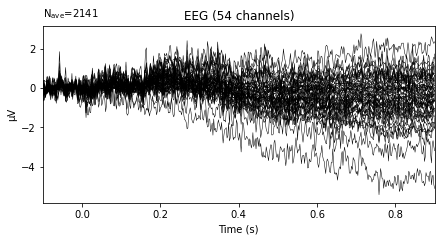

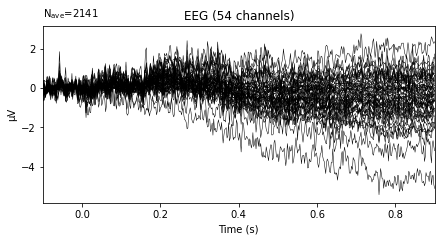

In [69]:
e[1].average().plot()

In [20]:
s1 = read_mat(DATA_DIR / "S01.mat", ignore_fields=["previous"], variable_names=["raw"])["raw"]

In [24]:
s1["label"]

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 'VEOG',
 'Aux5']

In [27]:
set(info["ch_names"]) - set(s1["label"])

{'29', 'AUD'}

In [9]:
from importlib_resources import files

In [ ]:
files(

In [11]:
info = build_mne_info()

/net/vast-storage.ib.cluster/scratch/vast/cpl/jgauthie/scratch/broderick2018/notebooks/../mfn400/adapters/brennan2018.py:41: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)


In [3]:
datasets = scipy.io.loadmat(DATA_DIR / "datasets.mat", simplify_cells=True)

In [4]:
print(sorted([x[1:3].lstrip("0") for x in datasets["use"]]))

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '25', '26', '3', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '44', '45', '48', '5', '6', '8']


In [34]:
raw_s1 = mne.io.read_raw_fieldtrip(DATA_DIR / "S01.mat", None, data_name="raw")

/tmp/ipykernel_51380/790896157.py:1: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  raw_s1 = mne.io.read_raw_fieldtrip(DATA_DIR / "S01.mat", None, data_name="raw")
/tmp/ipykernel_51380/790896157.py:1: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw_s1 = mne.io.read_raw_fieldtrip(DATA_DIR / "S01.mat", None, data_name="raw")
/tmp/ipykernel_51380/790896157.py:1: RuntimeWarning: Cannot guess the correct type of channel 1. Making it a MISC channel.
  raw_s1 = mne.io.read_raw_fieldtrip(DATA_DIR / "S01.mat", None, data_name="raw")
/tmp/ipykernel_51380/790896157.py:1: RuntimeWarning: Cannot guess the correct type of channel 2. Making it a MISC channel.
  raw_s1 = mne.io.read_raw_fieldtrip(DA

Creating RawArray with float64 data, n_channels=62, n_times=366525
    Range : 0 ... 366524 =      0.000 ...   733.048 secs
Ready.


In [35]:
raw_s1

<RawArray | 62 x 366525 (733.0 s), ~173.4 MB, data loaded>

In [5]:
ds1 = scipy.io.loadmat(DATA_DIR / "S01.mat", simplify_cells=True)

In [7]:
ds1["raw"]

{'hdr': {'Fs': 500,
  'nChans': 62,
  'label': array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
         '24', '25', '26', '27', '28', '30', '31', '32', '33', '34', '35',
         '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
         '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
         '58', '59', '60', '61', 'VEOG', 'Aux5'], dtype=object),
  'nSamples': 366525,
  'nSamplesPre': 0,
  'nTrials': 1,
  'chantype': array(['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
         'eeg', 

In [38]:
proc_8["proc"]

{'implicitref': '29',
 'refchannels': array(['25', '29'], dtype=object),
 'subject': 'S01',
 'dataset': array([], dtype='<U1'),
 'trl': array([[ 1.73600000e+03,  2.38600000e+03, -1.50000000e+02,
          1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
        [ 1.99500000e+03,  2.64500000e+03, -1.50000000e+02,
          1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
        [ 2.10600000e+03,  2.75600000e+03, -1.50000000e+02,
          1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
        ...,
        [ 3.63237000e+05,  3.63887000e+05, -1.50000000e+02,
          1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
        [ 3.63321000e+05,  3.63971000e+05, -1.50000000e+02,
          1.20000000e+01,  4.60644482e+01,  2.14900000e+03],
        [ 3.63452000e+05,  3.64102000e+05, -1.50000000e+02,
          1.20000000e+01,  4.63278492e+01,  2.15000000e+03]]),
 'varnames': array(['segment', 'tmin', 'Order'], dtype=object),
 'tot_trials': 2129,
 'tot_chans': 61,
 'impedence': {'bads'

In [45]:
proc_8["proc"]["rejections"]["final"]["chanpicks"]

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '23', '25',
       '26', '27', '28', '30', '33', '34', '35', '37', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '61', '29'], dtype=object)

In [13]:
import mne

In [47]:
dir(raw_s1)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_read_segment_file'

In [49]:
raw_s1._filenames

[None]

In [51]:
raw_s1.info["ch_types"]

KeyError: 'ch_types'